In [1]:
from datasets_dataloaders import create_gw_loaders

BATCH_SIZE = 16
NSAMPLES = 5

train_loader, test_loader = create_gw_loaders(nsamples=NSAMPLES, batch_size=BATCH_SIZE, dataset_lens=(16, 16))


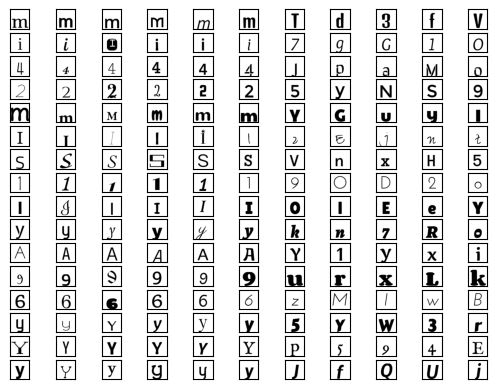

In [2]:
import matplotlib.pyplot as plt
from itertools import product

import torch

for (content_b, style_b), target_b in train_loader:

    _, sps = plt.subplots(BATCH_SIZE, NSAMPLES * 2 + 1)


    for i, j in product(range(BATCH_SIZE), range(NSAMPLES * 2 + 1)):
        sps[i, j].set_xticks([])
        sps[i, j].set_yticks([])
    for i in range(BATCH_SIZE):

        for j in range(NSAMPLES):
            sps[i, j].imshow(content_b[i][j].permute(1, 2, 0), cmap='gray')
        sps[i, NSAMPLES].imshow(target_b[i].permute(1, 2, 0), cmap='gray')

        for j in range(NSAMPLES):
            sps[i, j + NSAMPLES + 1].imshow(style_b[i][j].permute(1, 2, 0), cmap='gray')

    break

# print(batches)


In [3]:
from model import SeparatingStyleAndContent as Model
from model import separating_style_and_content_loss as loss_fn

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = Model(NSAMPLES).to(DEVICE)
optimizer = torch.optim.Adam(lr=0.02, params=model.parameters())
print(DEVICE)

SeparatingStyleAndContent(
  (style1): Sequential(
    (0): Flatten(start_dim=1, end_dim=2)
    (1): Conv2d(5, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Identity()
  )
  (style2): Sequential(
    (0): Identity()
    (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Identity()
  )
  (style3): Sequential(
    (0): Identity()
    (1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Identity()
  )
  (style4): Sequential(
    (0): Identity()
    (1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (2): Batch

In [4]:
from test_train_loop import train_test_routine

Epoch 4: test:   0%|          | 0/1 [00:01<?, ?it/s]


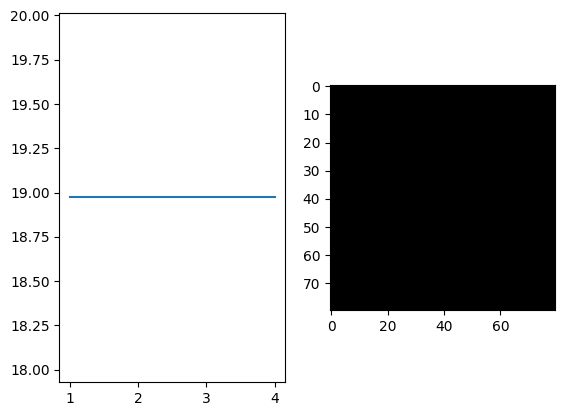

In [5]:
train_losses, test_losses = train_test_routine(model=model, optimizer=optimizer, lossfn=loss_fn, testloader=test_loader, trainloader=train_loader, device=DEVICE, epochs=4)

In [6]:
train_losses, test_losses

([7.938649040463186, 2.4063225346867068, 2.816702190054346, 2.079002245762673],
 [18.972446920359058,
  18.972446920359058,
  18.972446920359058,
  18.972446920359058])